<a href="https://colab.research.google.com/github/kimsunlim/TIL/blob/master/chapter5_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 트리 알고리즘

####1. 결정트리
- 결정트리 알고리즘을 사용해 분류문제를 풀어보자 

Q:6497개의 샘플데이터에서 화이트 와인과 레드와인 종류를 구별해 보자 

1) 로지스틱 회귀로 와인 분류해 보기 

In [1]:
import pandas as pd 
wine= pd.read_csv('https://bit.ly/wine_csv_data')

In [3]:
wine.head()
#class 는 타깃값으로 0이면 레드와인, 1이면 화이트와인 

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [4]:
# 6497개 데이터, 실수형, 누락값 없음
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [6]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [10]:
#1.
#특성데이터와 타깃데이터 분류 
#데이터 프레임에 넣고 넘파이 배열로 변환 !!

data= wine[['alcohol',	'sugar',	'pH'	]].to_numpy()
target=wine['class'].to_numpy()

In [11]:
#2.
#훈련데이터와 테스트 데이터로 분류 

from sklearn.model_selection import train_test_split

train_input,test_input,train_target,test_target= train_test_split(data, target,test_size=0.2 , random_state=42)

In [12]:
# 훈련데이터와 테스트 데이터 크기 확인 
print(train_input.shape, test_input.shape)

#훈련데이터는 5197개, 테스트 데이터 1300개 

(5197, 3) (1300, 3)


In [14]:
#3.
#특성치인 알코올, 도수 등의 스케일이 다름 
#표준화 해주기 

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(train_input) #특성치에 fit하기 

train_scaled= ss.transform(train_input)
test_scaled=ss.transform(test_input)



In [15]:
#4.
#모델학습
#로지스틱 회귀 학습

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(train_scaled,train_target) #훈련데이터  fit

#학습 정확도 추출
print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled,test_target))

#점수가 높지 않음 >> 화이트 와인 골라내는게 어려운가봄
# 수치가 둘다 낮은거 보니, 다소 과소적합 >>규제변수C값 조정

0.7808350971714451
0.7776923076923077


In [16]:
print(lr.coef_, lr.intercept_)
## 알코올과 당도가 높을수록 화이트와인, ph가 높을수록 레드와인일 가능성 높음

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


- 약 77% 정확도 
- 조금 더 쉽게 설명 할수 있는 모델을 찾아보자 

2) 결정트리 
- 이유를 설명하기 쉽다. 스무고개 같음
- 질문을 추가해서 분류 정확도를 높일 수 있음 

In [17]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

##정확도 높아짐~!
## 테스트정확도는 낮아서 과대적합된 모델

0.996921300750433
0.8584615384615385


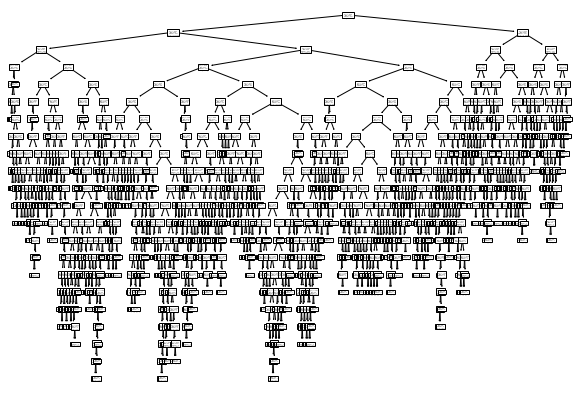

In [19]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()
#plot_tree 결정트리 모델 객체를 시각화 
# 맨위가 루트노드 맨 밑이 리프 노드

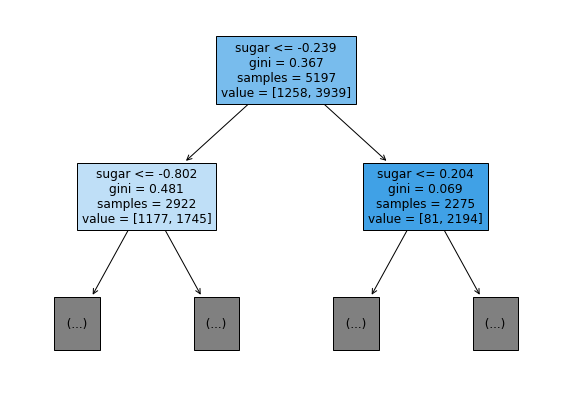

In [20]:
#위의 그림 복잡하니 트리 깊이 제한해서 출력 

plt.figure(figsize=(10,7))
plot_tree(dt,max_depth=1, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()

[ 루트노드 설명]

-  당도가 -0.239이하인지 질문을 한다.
- 왼쪽이 yes, 오른쪽이 no
- 노드의 총샘플수 5197개 
- 레드와인1258, 화이트와인3939개 

In [21]:
##가지치기 
#자라날 수 있는 트리의 최대 깊이를 정하는것
#무작정 자라나는 가지는 테스트 점수에 못미쳐서 일반화가 잘 안될수 있음 



dt=DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


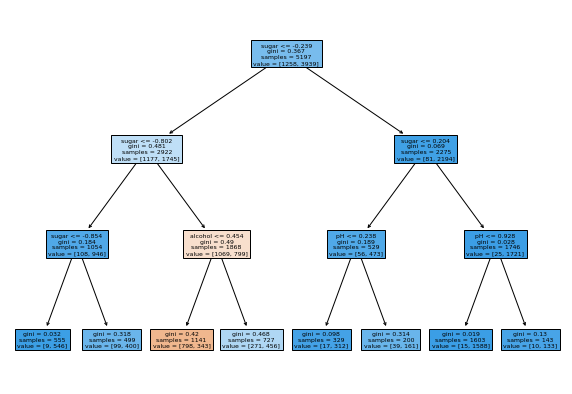

In [23]:
plt.figure(figsize=(10,7))
plot_tree(dt, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()

In [24]:
## 루트노드와 깊이1에서 당도를 사용해서 당도가 가장 유용한 특성!
#특성 중요도
print(dt.feature_importances_)
#두번째 당도 특성 값이 제일 높음

[0.12345626 0.86862934 0.0079144 ]


#### 2. 교차검증과 그리드서치 

검증세트는 훈련세트를 또 나누는 것

In [25]:
import pandas as pd 
wine= pd.read_csv('https://bit.ly/wine_csv_data')

In [26]:
data= wine[['alcohol',	'sugar',	'pH'	]].to_numpy()
target=wine['class'].to_numpy()

In [27]:
from sklearn.model_selection import train_test_split

train_input,test_input,train_target,test_target= train_test_split(data, target,test_size=0.2 , random_state=42)

In [29]:
#검증세트 분리
sub_input, val_input, sub_target, val_target =train_test_split(train_input, train_target, test_size=0.2 , random_state=42)

In [30]:
#훈련세트와 검증세트 크기 
print(sub_input.shape, val_input.shape)

#원래 5197개였던 훈련데이터가 4157개가 되고 검증세트는 1040개가 됨 

(4157, 3) (1040, 3)


In [31]:
# 트리 모델 학습 

from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(sub_input, sub_target)

print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))
#훈련세트와 검증세트의 정확도 

0.9971133028626413
0.8673076923076923


In [32]:
## 더 높은 정확도를 위해 교차검증 k-폴드 교차검증

from sklearn.model_selection import cross_validate
scores= cross_validate(dt, train_input, train_target)
print(scores)


{'fit_time': array([0.0189991 , 0.00999641, 0.01031756, 0.00998425, 0.0096159 ]), 'score_time': array([0.00140238, 0.00130057, 0.00122499, 0.00119734, 0.00113273]), 'test_score': array([0.87307692, 0.85      , 0.87584216, 0.85274302, 0.83830606])}


In [35]:
#최종점수는 test_score점수를 평균하여 얻을수 있음
import numpy as np
print(np.mean(scores['test_score']))

0.8579936329310728


#### 3. 하이퍼파라미터 튜닝
- 그리드서치 : 하이퍼파라미터 탐색과 교차검증을 한번에 수행

In [36]:
from sklearn.model_selection import GridSearchCV

params={'min_impurity_decrease':[0.0001,0.0002,0.0003,0.0004,0.0005]} #파라미터값 5개 지정 

In [38]:
gs=GridSearchCV(DecisionTreeClassifier(random_state=42),params,n_jobs=-1)
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

In [39]:
dt=gs.best_estimator_
print(dt.score(train_input, train_target))

0.9615162593804117


In [40]:
print(gs.best_params_)
#가장 좋은값 0.0001

{'min_impurity_decrease': 0.0001}


In [41]:
#교차검증의 평균 점수 
print(gs.cv_results_['mean_test_score'])

[0.86819297 0.86453617 0.86492226 0.86780891 0.86761605]


In [42]:
##결정트리 매개 변수를 조합

params={'min_impurity_decrease':np.arange(0.0001,0.001,0.0001),
        'max_depth':range(5,20,1),
        'min_samples_split':range(2,100,10)
        }

In [43]:
gs=GridSearchCV(DecisionTreeClassifier(random_state=42),params,n_jobs=-1)
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(5, 20),
                         'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                         'min_samples_split': range(2, 100, 10)})

In [45]:
#최상의 매개 변수 조합
print(gs.best_params_)

{'max_depth': 14, 'min_impurity_decrease': 0.0004, 'min_samples_split': 12}


In [46]:
#최상의 교차검증 점수 
print(np.max(gs.cv_results_['mean_test_score']))

0.8683865773302731


- 랜덤서치 : 매개변수 범위 미리정하기 어려울때 사용
- 확률분포 객체를 전달 


In [49]:
from scipy.stats import uniform, randint

In [51]:
#randint 정숫값 균등 분포에서 샘플링
rgen=randint(0,10)
rgen.rvs(10)

array([8, 8, 7, 9, 5, 3, 1, 1, 1, 1])

In [52]:
#uniform 실숫값 샘플링
ugen= uniform(0,1)
ugen.rvs(10)

array([0.6687043 , 0.40679397, 0.50605524, 0.41095019, 0.3505314 ,
       0.71386258, 0.19493433, 0.43822248, 0.4569912 , 0.04198598])

In [53]:
params={'min_impurity_decrease':uniform(0.0001,0.001),
        'max_depth':randint(20,50),
        'min_samples_split':randint(1,25),
        }

In [54]:
from sklearn.model_selection import RandomizedSearchCV

gs=RandomizedSearchCV(DecisionTreeClassifier(random_state=42),params, n_iter=100,n_jobs=-1,random_state=42)

gs.fit(train_input, train_target)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 254, in fit
    % self.min_samples_split
ValueError: min_samples_split must be an integer greater than 1 or a float 

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb8c6b87b10>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb8c9568ed0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb8c6b6efd0>},
                   random_state=42)

In [58]:
print(gs.best_params_)

{'max_depth': 29, 'min_impurity_decrease': 0.000437615171403628, 'min_samples_split': 15}


In [59]:
print(np.max(gs.cv_results_['mean_test_score']))

nan


In [60]:
dt=gs.best_estimator_
print(dt.score(test_input, test_target))

0.8623076923076923
